In [1]:
#cookiecutter https://github.com/drivendata/cookiecutter-data-science.git
#imports
import pandas as pd
import numpy as np
import os

# Import data using Pandas

In [2]:
!pwd
!ls -l ../data/raw

/Users/mildo/MyDocuments/datascience/titanic-ds-python/titanic-ds-python/notebooks
total 184
-rw-r--r--  1 mildo  staff   3258 Aug 24 16:23 gender_submission.csv
-rw-r--r--  1 mildo  staff  28629 Aug 24 16:23 test.csv
-rw-r--r--  1 mildo  staff  61194 Aug 24 16:23 train.csv


In [3]:
# set the file paths
raw_data_path = os.path.join(os.path.pardir,'data','raw')
train_data_path = os.path.join(raw_data_path, 'train.csv')
test_data_path = os.path.join(raw_data_path, 'test.csv')
print (train_data_path)
open(train_data_path,"r").readline()

../data/raw/train.csv


'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\n'

In [4]:
#read data with default parameters using panda df
train_df = pd.read_csv(train_data_path,index_col="PassengerId")
test_df = pd.read_csv(test_data_path,index_col="PassengerId")

In [5]:
#get the type of the DF to confirm that we have propertly loaded the dataframe
type(train_df)
type(test_df)

pandas.core.frame.DataFrame

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [8]:
print (" the size of the datasset is ", train_df.size, " and the dimension is", train_df.ndim, " Shape is ", train_df.shape) 
print ("the amount of rows per column is\n",train_df.count())
train_df.shape
train_df.describe()

 the size of the datasset is  9801  and the dimension is 2  Shape is  (891, 11)
the amount of rows per column is
 Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# join datasets 
test_df['Survived']=-888

In [10]:
test_df['Survived'].size

418

In [11]:
df = pd.concat((test_df,train_df), axis=0, sort=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [13]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
892,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,3,male,0,-888,330911
893,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,3,female,1,-888,363272
894,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,2,male,0,-888,240276
895,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,3,male,0,-888,315154
896,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,3,female,1,-888,3101298


In [14]:
df.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
892,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,3,male,0,-888,330911
893,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,3,female,1,-888,363272
894,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,2,male,0,-888,240276
895,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,3,male,0,-888,315154
896,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,3,female,1,-888,3101298
897,14.0,NaN,S,9.2250,"Svensson, Mr. Johan Cervin",0,3,male,0,-888,7538
898,30.0,NaN,Q,7.6292,"Connolly, Miss. Kate",0,3,female,0,-888,330972
899,26.0,NaN,S,29.0000,"Caldwell, Mr. Albert Francis",1,2,male,1,-888,248738
900,18.0,NaN,C,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,3,female,0,-888,2657


In [15]:
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
887,27.0,NaN,S,13.00,"Montvila, Rev. Juozas",0,2,male,0,0,211536
888,19.0,B42,S,30.00,"Graham, Miss. Margaret Edith",0,1,female,0,1,112053
889,NaN,NaN,S,23.45,"Johnston, Miss. Catherine Helen ""Carrie""",2,3,female,1,0,W./C. 6607
890,26.0,C148,C,30.00,"Behr, Mr. Karl Howell",0,1,male,0,1,111369
891,32.0,NaN,Q,7.75,"Dooley, Mr. Patrick",0,3,male,0,0,370376


In [16]:
df.tail(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
882,33.0,NaN,S,7.8958,"Markun, Mr. Johann",0,3,male,0,0,349257
883,22.0,NaN,S,10.5167,"Dahlberg, Miss. Gerda Ulrika",0,3,female,0,0,7552
884,28.0,NaN,S,10.5000,"Banfield, Mr. Frederick James",0,2,male,0,0,C.A./SOTON 34068
885,25.0,NaN,S,7.0500,"Sutehall, Mr. Henry Jr",0,3,male,0,0,SOTON/OQ 392076
886,39.0,NaN,Q,29.1250,"Rice, Mrs. William (Margaret Norton)",5,3,female,0,0,382652
887,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,2,male,0,0,211536
888,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,1,female,0,1,112053
889,NaN,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,3,female,1,0,W./C. 6607
890,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,1,male,0,1,111369


In [17]:
df.Name

PassengerId
892                                     Kelly, Mr. James
893                     Wilkes, Mrs. James (Ellen Needs)
894                            Myles, Mr. Thomas Francis
895                                     Wirz, Mr. Albert
896         Hirvonen, Mrs. Alexander (Helga E Lindqvist)
897                           Svensson, Mr. Johan Cervin
898                                 Connolly, Miss. Kate
899                         Caldwell, Mr. Albert Francis
900            Abrahim, Mrs. Joseph (Sophie Halaut Easu)
901                              Davies, Mr. John Samuel
902                                     Ilieff, Mr. Ylio
903                           Jones, Mr. Charles Cresson
904        Snyder, Mrs. John Pillsbury (Nelle Stevenson)
905                                 Howard, Mr. Benjamin
906    Chaffee, Mrs. Herbert Fuller (Carrie Constance...
907        del Carlo, Mrs. Sebastiano (Argenia Genovesi)
908                                    Keane, Mr. Daniel
909                

In [18]:
df["Name"]

PassengerId
892                                     Kelly, Mr. James
893                     Wilkes, Mrs. James (Ellen Needs)
894                            Myles, Mr. Thomas Francis
895                                     Wirz, Mr. Albert
896         Hirvonen, Mrs. Alexander (Helga E Lindqvist)
897                           Svensson, Mr. Johan Cervin
898                                 Connolly, Miss. Kate
899                         Caldwell, Mr. Albert Francis
900            Abrahim, Mrs. Joseph (Sophie Halaut Easu)
901                              Davies, Mr. John Samuel
902                                     Ilieff, Mr. Ylio
903                           Jones, Mr. Charles Cresson
904        Snyder, Mrs. John Pillsbury (Nelle Stevenson)
905                                 Howard, Mr. Benjamin
906    Chaffee, Mrs. Herbert Fuller (Carrie Constance...
907        del Carlo, Mrs. Sebastiano (Argenia Genovesi)
908                                    Keane, Mr. Daniel
909                

In [19]:
df[["Age","Name"]]

,Age,Name
PassengerId,,
892,34.5,"Kelly, Mr. James"
893,47.0,"Wilkes, Mrs. James (Ellen Needs)"
894,62.0,"Myles, Mr. Thomas Francis"
895,27.0,"Wirz, Mr. Albert"
896,22.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
897,14.0,"Svensson, Mr. Johan Cervin"
898,30.0,"Connolly, Miss. Kate"
899,26.0,"Caldwell, Mr. Albert Francis"
900,18.0,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)"


# Indexing

In [20]:
# selecciona las filas desde la 5 hasta la 10
df[5:10]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
897,14.0,NaN,S,9.2250,"Svensson, Mr. Johan Cervin",0,3,male,0,-888,7538
898,30.0,NaN,Q,7.6292,"Connolly, Miss. Kate",0,3,female,0,-888,330972
899,26.0,NaN,S,29.0000,"Caldwell, Mr. Albert Francis",1,2,male,1,-888,248738
900,18.0,NaN,C,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,3,female,0,-888,2657
901,21.0,NaN,S,24.1500,"Davies, Mr. John Samuel",0,3,male,2,-888,A/4 48871


In [21]:
#selecciona las filas desde el indice 5 hasta el 10
#ALL COLUMNS
df.loc[5:10,]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female,1,1,237736


In [22]:
#selecciona las filas desde el indice 5 hasta el 10
# selecciona el rango de columnas en orden 
#NO ES LOS MISMO df.loc[5:10, "Age": "Name"] que df.loc[5:10, "Name": "Age"]
df.loc[5:10, "Age": "Name"]

,Age,Cabin,Embarked,Fare,Name
PassengerId,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry"
6,NaN,NaN,Q,8.4583,"Moran, Mr. James"
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J"
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard"
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)"


In [23]:
df.loc[5:10, ["Age", "Name"]]

,Age,Name
PassengerId,,
5,35.0,"Allen, Mr. William Henry"
6,NaN,"Moran, Mr. James"
7,54.0,"McCarthy, Mr. Timothy J"
8,2.0,"Palsson, Master. Gosta Leonard"
9,27.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
10,14.0,"Nasser, Mrs. Nicholas (Adele Achem)"


In [24]:
df.iloc[1:4,]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
893,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,3,female,1,-888,363272
894,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,2,male,0,-888,240276
895,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,3,male,0,-888,315154


In [25]:
df.iloc[1:4,1:5]

,Cabin,Embarked,Fare,Name
PassengerId,,,,
893,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)"
894,NaN,Q,9.6875,"Myles, Mr. Thomas Francis"
895,NaN,S,8.6625,"Wirz, Mr. Albert"


In [26]:
#filter conditions
#use & |  to compose conditions 
male_passengers = df.loc[df.Sex=='male',]
print ("number of male passengers: {0} ".format(len(male_passengers)))
male_passengers = df.loc[(df.Sex=='male') & (df.Pclass==1),]
print ("number of male passengers: {0} ".format(len(male_passengers)))

number of male passengers: 843 
number of male passengers: 179 


# Summary statics

In [27]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [28]:
# numerical feature
# centrality measures
print('Mean fare : {0}'.format(df.Fare.mean())) # mean
print('Median fare : {0}'.format(df.Fare.median())) # median

Mean fare : 33.295479281345585
Median fare : 14.4542


In [29]:
# dispersion measures
print('Min fare : {0}'.format(df.Fare.min())) # minimum
print('Max fare : {0}'.format(df.Fare.max())) # maximum
print('Fare range : {0}'.format(df.Fare.max()  - df.Fare.min())) # range
print('25 percentile : {0}'.format(df.Fare.quantile(.25))) # 25 percentile
print('50 percentile : {0}'.format(df.Fare.quantile(.5))) # 50 percentile
print('75 percentile : {0}'.format(df.Fare.quantile(.75))) # 75 percentile
print('Variance fare : {0}'.format(df.Fare.var())) # variance
print('Standard deviation fare : {0}'.format(df.Fare.std())) # standard deviation

Min fare : 0.0
Max fare : 512.3292
Fare range : 512.3292
25 percentile : 7.8958
50 percentile : 14.4542
75 percentile : 31.275
Variance fare : 2678.959737892895
Standard deviation fare : 51.758668239174156


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [31]:
#df.loc[df.Parch == 0 ,"Parch"] = 100

In [32]:
# Deleting columns
# Delete the "Area" column from the dataframe
#data = data.drop("delete", axis=1)
# alternatively, delete columns using the columns parameter of drop
#data = data.drop(columns="delete")
# Delete the Area column from the dataframe in place
# Note that the original 'data' object is changed when inplace=True
# df.drop("delete", axis=1, inplace=True)
# Delete multiple columns from the dataframe
#data = data.drop(["Y2001", "Y2002", "Y2003"], axis=1)


In [33]:
%matplotlib inline

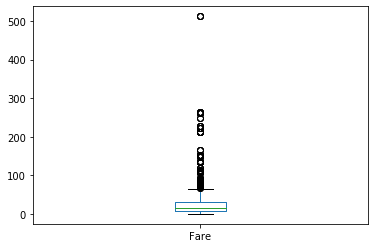

In [34]:
df.Fare.plot(kind="box")

In [35]:
df.describe(include="all")

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Kelly, Mr. James",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-283.301757,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,414.337413,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-888.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [36]:
# categorical column : Counts
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [37]:
# categorical column : Proprotions
df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [38]:
# apply on other columns
df[df.Survived != -888].Survived.value_counts() 


0    549
1    342
Name: Survived, dtype: int64

In [39]:
# count : Passenger class
df.Pclass.value_counts() 

3    709
1    323
2    277
Name: Pclass, dtype: int64

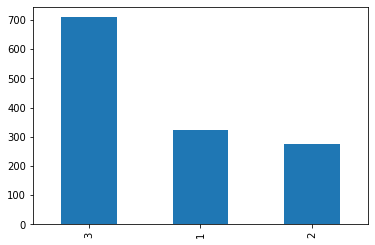

In [40]:
df.Pclass.value_counts().plot(kind="bar")

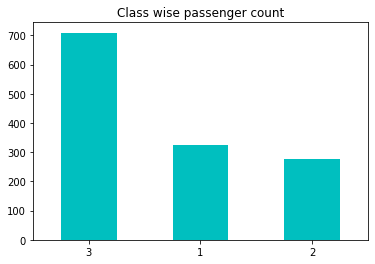

In [41]:
# title : to set title, color : to set color,  rot : to rotate labels 
# the semicolon saca el <matplot..xxxxx> 
df.Pclass.value_counts().plot(kind='bar',rot = 0, title='Class wise passenger count', color='c');

51
31
27
116


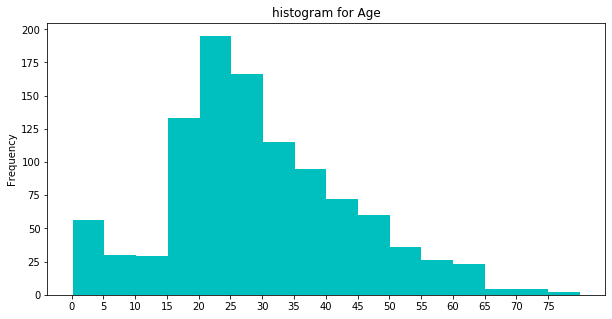

In [42]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
# use hist to create histogram
df.Age.plot(kind='hist', title='histogram for Age', color='c',xticks=range(0,80,5), bins=16);

print(df.loc[(df.Age>=0) & (df.Age<5),].Age.count())
print (df.loc[(df.Age>=5) & (df.Age<10),].Age.count())
print(df.loc[(df.Age>=10) & (df.Age<15),].Age.count())
print (df.loc[(df.Age>=15) & (df.Age<20),].Age.count())

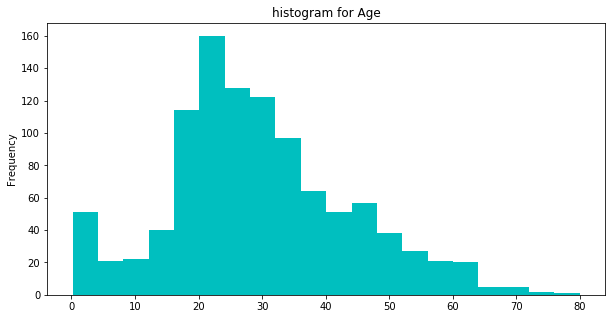

In [43]:
# use bins to add or remove bins
df.Age.plot(kind='hist', title='histogram for Age', color='c', bins=20);

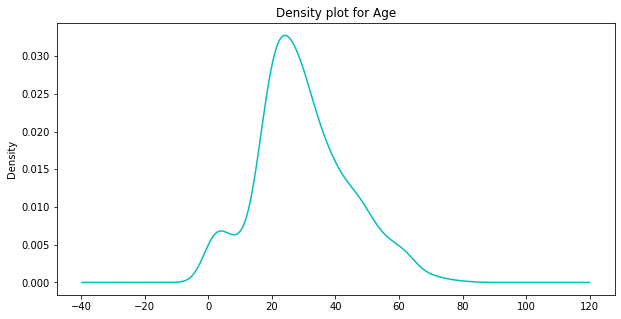

In [44]:
# use kde for density plot
df.Age.plot(kind='kde', title='Density plot for Age', color='c');

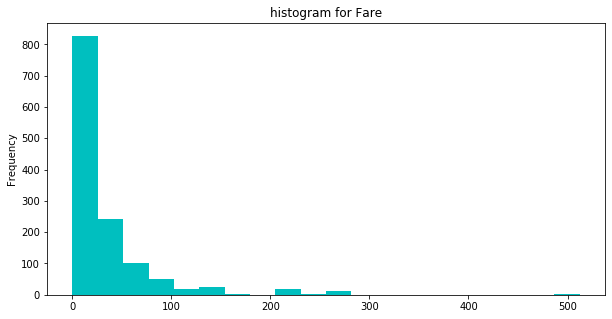

In [45]:
# histogram for fare
df.Fare.plot(kind='hist', title='histogram for Fare', color='c', bins=20);

In [46]:
print('skewness for age : {0:.2f}'.format(df.Age.skew()))
print('skewness for fare : {0:.2f}'.format(df.Fare.skew()))

skewness for age : 0.41
skewness for fare : 4.37


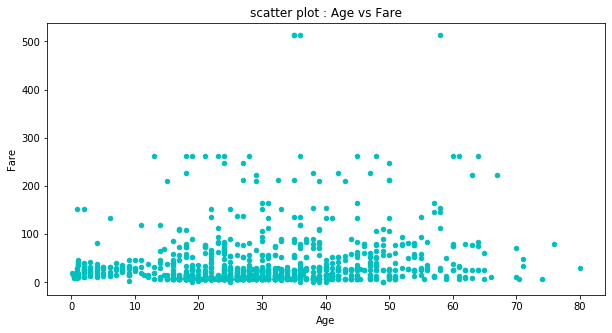

In [47]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,5 ]
# use scatter plot for bi-variate distribution
df.plot.scatter(x='Age', y='Fare', color='c', title='scatter plot : Age vs Fare');

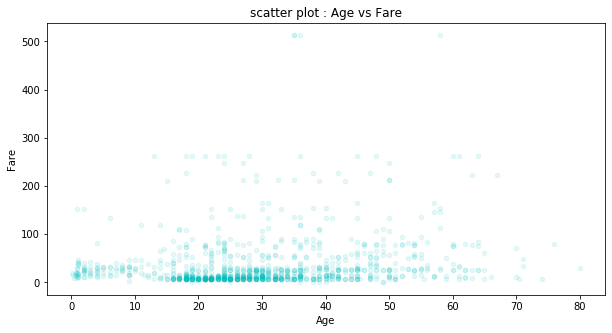

In [48]:
# use alpha to set the transparency
df.plot.scatter(x='Age', y='Fare', color='c', title='scatter plot : Age vs Fare', alpha=0.1);

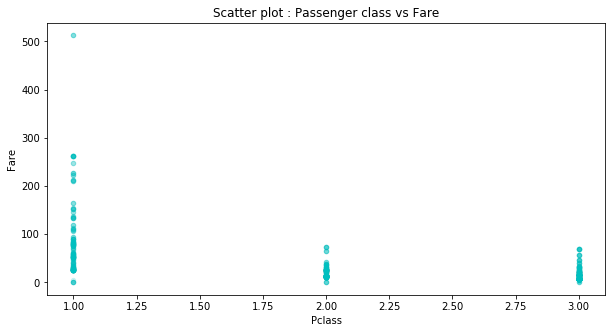

In [49]:
df.plot.scatter(x='Pclass', y='Fare', color='c', title='Scatter plot : Passenger class vs Fare', alpha=0.15);

In [50]:
# group by 
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [51]:
# group by 
df.groupby(['Pclass']).Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [52]:
df.groupby(['Pclass']).Age.median()


Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [53]:
df.groupby(['Pclass','Sex']).Ticket.count()

Pclass  Sex   
1       female    144
        male      179
2       female    106
        male      171
3       female    216
        male      493
Name: Ticket, dtype: int64

In [54]:
df.groupby(['Pclass'])['Fare','Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [55]:
df.groupby(['Pclass']).agg({'Fare' : 'mean', 'Age' : 'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [56]:
# more complicated aggregations 
aggregations = {
    'Fare': { # work on the "Fare" column
        'mean_Fare': 'mean',  # get the mean fare
        'median_Fare': 'median', # get median fare
        'max_Fare': max,
        'min_Fare': np.min
    },
    'Age': {     # work on the "Age" column
        'median_Age': 'median',   # Find the max, call the result "max_date"
        'min_Age': min,
        'max_Age': max,
        'range_Age': lambda x: max(x) - min(x)  # Calculate the age range per group
    }
}
df.groupby(['Pclass']).aggregate(aggregations)

/Users/mildo/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age                  \
        mean_Fare median_Fare  max_Fare min_Fare median_Age min_Age max_Age   
Pclass                                                                        
1       87.508992     60.0000  512.3292      0.0       39.0    0.92    80.0   
2       21.179196     15.0458   73.5000      0.0       29.0    0.67    70.0   
3       13.302889      8.0500   69.5500      0.0       24.0    0.17    74.0   

                  
       range_Age  
Pclass            
1          79.08  
2          69.33  
3          73.83

In [57]:
df[df.Age<1].Age*100

PassengerId
1093    33.0
1142    92.0
1173    75.0
1199    83.0
1246    17.0
79      83.0
306     92.0
470     75.0
645     75.0
756     67.0
804     42.0
832     83.0
Name: Age, dtype: float64

In [58]:
df.loc[df.Fare==0,['Name','Fare', 'Age']]

,Name,Fare,Age
PassengerId,,,
1158,"Chisholm, Mr. Roderick Robert Crispin",0.0,NaN
1264,"Ismay, Mr. Joseph Bruce",0.0,49.0
180,"Leonard, Mr. Lionel",0.0,36.0
264,"Harrison, Mr. William",0.0,40.0
272,"Tornquist, Mr. William Henry",0.0,25.0
278,"Parkes, Mr. Francis ""Frank""",0.0,NaN
303,"Johnson, Mr. William Cahoone Jr",0.0,19.0
414,"Cunningham, Mr. Alfred Fleming",0.0,NaN
467,"Campbell, Mr. William",0.0,NaN


In [59]:
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

# Crosstabs

In [60]:
# crosstab on Sex and Pclass
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


In [61]:
#Crosstabs no son groupings 
# Los groupings son listados no tablas de doble entrada
#S e tiene que usar el truco de unstack para pasar de listing a tabla
df.groupby(['Sex','Pclass']).Name.count().unstack()


Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


In [62]:
# El orden de agrupamiento importa, el primer elemento de la lista de groupby representa las filas 
df.groupby(['Pclass','Sex']).Name.count().unstack()

Sex,female,male
Pclass,,
1,144,179
2,106,171
3,216,493


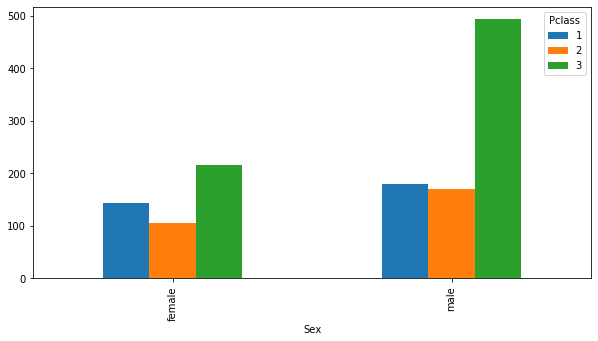

In [63]:
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar');

# Pivots

In [64]:
# pivot table
df.pivot_table(index='Sex',columns = 'Pclass',values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [65]:
df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [66]:
df.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


## Data Munging : Working with missing values

In [67]:
# use .info() to detect missing values (if any)
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


### Los nulos (datos faltantes) pueden ser resultos mediante barrondo la columna o mediante tecnicas de data imputation. 
### Estas tecnicas reemplazan lo datos faltantes con:
        La media o mediana para variables continuas y 
        Con la moda para variables categoricas 


In [68]:
# extract rows with Embarked as Null
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [69]:
# how many people embarked at different points
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [70]:
# which embarked point has higher survival count
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [71]:
# impute the missing values with 'S'
# df.loc[df.Embarked.isnull(), 'Embarked'] = 'S'
# df.Embarked.fillna('S', inplace=True)

In [72]:
# Option 2 : explore the fare of each class for each embarkment point
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [73]:
# replace the missing values with 'C'
df.Embarked.fillna('C', inplace=True)

In [74]:
# check if any null value remaining
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [75]:
# check info again
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [76]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [77]:
# mi solucion
df.pivot_table(index='Pclass',columns = 'Embarked',values='Fare', aggfunc='median')

Embarked,C,Q,S
Pclass,,,
1,78.2667,90.00,52.000
2,15.3146,12.35,15.375
3,7.8958,7.75,8.050


In [78]:
# Solucion sugerida .... mismo resultado distinta forma de calcular
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'),'Fare'].median()
print (median_fare)

8.05


In [79]:
df.Fare.fillna(median_fare, inplace=True)

In [80]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


### Feature : Age

In [81]:
df[df.Age.isnull()].Name.count()

263

In [82]:
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
902,NaN,NaN,S,7.8958,"Ilieff, Mr. Ylio",0,3,male,0,-888,349220
914,NaN,NaN,S,31.6833,"Flegenheim, Mrs. Alfred (Antoinette)",0,1,female,0,-888,PC 17598
921,NaN,NaN,C,21.6792,"Samaan, Mr. Elias",0,3,male,2,-888,2662
925,NaN,NaN,S,23.4500,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",2,3,female,1,-888,W./C. 6607
928,NaN,NaN,S,8.0500,"Roth, Miss. Sarah A",0,3,female,0,-888,342712
931,NaN,NaN,S,56.4958,"Hee, Mr. Ling",0,3,male,0,-888,1601
933,NaN,D34,S,26.5500,"Franklin, Mr. Thomas Parham",0,1,male,0,-888,113778
939,NaN,NaN,Q,7.7500,"Shaughnessy, Mr. Patrick",0,3,male,0,-888,370374
946,NaN,NaN,C,15.5792,"Mangiavacchi, Mr. Serafino Emilio",0,2,male,0,-888,SC/A.3 2861


In [83]:
# set maximum number of rows to be displayed
pd.options.display.max_rows = 15
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
902,NaN,NaN,S,7.8958,"Ilieff, Mr. Ylio",0,3,male,0,-888,349220
914,NaN,NaN,S,31.6833,"Flegenheim, Mrs. Alfred (Antoinette)",0,1,female,0,-888,PC 17598
921,NaN,NaN,C,21.6792,"Samaan, Mr. Elias",0,3,male,2,-888,2662
925,NaN,NaN,S,23.4500,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",2,3,female,1,-888,W./C. 6607
928,NaN,NaN,S,8.0500,"Roth, Miss. Sarah A",0,3,female,0,-888,342712
931,NaN,NaN,S,56.4958,"Hee, Mr. Ling",0,3,male,0,-888,1601
933,NaN,D34,S,26.5500,"Franklin, Mr. Thomas Parham",0,1,male,0,-888,113778
...,...,...,...,...,...,...,...,...,...,...,...
847,NaN,NaN,S,69.5500,"Sage, Mr. Douglas Bullen",2,3,male,8,0,CA. 2343


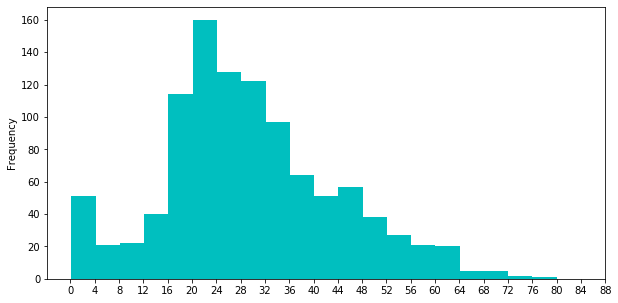

In [84]:
df.Age.plot(kind='hist',bins=20,xticks=range(0,90,4),color='c');

In [85]:
df.Age.mean()

29.881137667304014

In [86]:
df.Age.median()

28.0

In [87]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [88]:
df.groupby('Sex').Age.mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

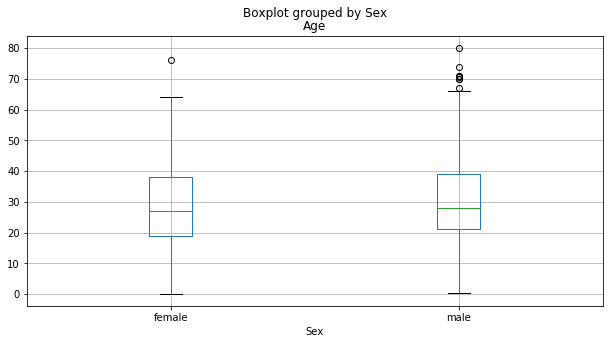

In [89]:
# visualize using boxplot
df[df.Age.notnull()].boxplot('Age','Sex');
#como la distribucion es muy parecida entre hombres y mujeres el genero 
#no parece un factor para predecir el valor de los valores faltantes 

### Option 3 replace with median age of Pclass

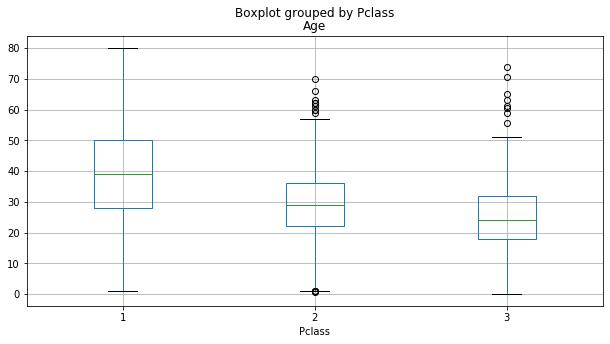

In [90]:
# option 3 : replace with median age of Pclass
df[df.Age.notnull()].boxplot('Age','Pclass');


In [91]:
# replace : 
# pclass_age_median = df.groupby('Pclass').Age.transform('median')
# df.Age.fillna(pclass_age_median , inplace=True)

### option 4 : replace with median age of title

In [92]:
# option 4 : replace with median age of title
df.Name

PassengerId
892                                Kelly, Mr. James
893                Wilkes, Mrs. James (Ellen Needs)
894                       Myles, Mr. Thomas Francis
895                                Wirz, Mr. Albert
896    Hirvonen, Mrs. Alexander (Helga E Lindqvist)
897                      Svensson, Mr. Johan Cervin
898                            Connolly, Miss. Kate
                           ...                     
885                          Sutehall, Mr. Henry Jr
886            Rice, Mrs. William (Margaret Norton)
887                           Montvila, Rev. Juozas
888                    Graham, Miss. Margaret Edith
889        Johnston, Miss. Catherine Helen "Carrie"
890                           Behr, Mr. Karl Howell
891                             Dooley, Mr. Patrick
Name: Name, Length: 1309, dtype: object

In [93]:
# Function to extract the title from the name 
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [94]:
# use map function to apply the function on each Name value row i
df.Name.map(lambda x : GetTitle(x)) # alternatively you can use : df.Name.map(GetTitle)

PassengerId
892      mr
893     mrs
894      mr
895      mr
896     mrs
897      mr
898    miss
       ... 
885      mr
886     mrs
887     rev
888    miss
889    miss
890      mr
891      mr
Name: Name, Length: 1309, dtype: object

In [95]:
df.Name.map(GetTitle).unique()

array(['mr', 'mrs', 'miss', 'master', 'ms', 'col', 'rev', 'dr', 'dona',
       'don', 'mme', 'major', 'lady', 'sir', 'mlle', 'capt',
       'the countess', 'jonkheer'], dtype=object)

In [96]:
# Function to extract the title from the name 
def GetTitle(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [97]:
# create Title feature
df['Title'] =  df.Name.map(lambda x : GetTitle(x))

In [98]:
df[df['Age']<1]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1093,0.33,NaN,S,14.4000,"Danbom, Master. Gilbert Sigvard Emanuel",2,3,male,0,-888,347080,Master
1142,0.92,NaN,S,27.7500,"West, Miss. Barbara J",2,2,female,1,-888,C.A. 34651,Miss
1173,0.75,NaN,S,13.7750,"Peacock, Master. Alfred Edward",1,3,male,1,-888,SOTON/O.Q. 3101315,Master
1199,0.83,NaN,S,9.3500,"Aks, Master. Philip Frank",1,3,male,0,-888,392091,Master
1246,0.17,NaN,S,20.5750,"Dean, Miss. Elizabeth Gladys Millvina""""",2,3,female,1,-888,C.A. 2315,Miss
79,0.83,NaN,S,29.0000,"Caldwell, Master. Alden Gates",2,2,male,0,1,248738,Master
306,0.92,C22 C26,S,151.5500,"Allison, Master. Hudson Trevor",2,1,male,1,1,113781,Master
470,0.75,NaN,C,19.2583,"Baclini, Miss. Helene Barbara",1,3,female,2,1,2666,Miss
645,0.75,NaN,C,19.2583,"Baclini, Miss. Eugenie",1,3,female,2,1,2666,Miss


In [99]:
df.loc[[1093,1142,1173,1199]]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1093,0.33,NaN,S,14.400,"Danbom, Master. Gilbert Sigvard Emanuel",2,3,male,0,-888,347080,Master
1142,0.92,NaN,S,27.750,"West, Miss. Barbara J",2,2,female,1,-888,C.A. 34651,Miss
1173,0.75,NaN,S,13.775,"Peacock, Master. Alfred Edward",1,3,male,1,-888,SOTON/O.Q. 3101315,Master
1199,0.83,NaN,S,9.350,"Aks, Master. Philip Frank",1,3,male,0,-888,392091,Master


In [115]:
df.loc[df['Age']<1,['Age']] = df.loc[df['Age']<1,['Age']]*100
df.loc[[1093,1142,1173,1199]]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1093,33.0,NaN,S,14.400,"Danbom, Master. Gilbert Sigvard Emanuel",2,3,male,0,-888,347080,Master
1142,92.0,NaN,S,27.750,"West, Miss. Barbara J",2,2,female,1,-888,C.A. 34651,Miss
1173,75.0,NaN,S,13.775,"Peacock, Master. Alfred Edward",1,3,male,1,-888,SOTON/O.Q. 3101315,Master
1199,83.0,NaN,S,9.350,"Aks, Master. Philip Frank",1,3,male,0,-888,392091,Master


In [101]:
# head 
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
892,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,3,male,0,-888,330911,Mr
893,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,3,female,1,-888,363272,Mrs
894,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,2,male,0,-888,240276,Mr
895,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,3,male,0,-888,315154,Mr
896,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,3,female,1,-888,3101298,Mrs


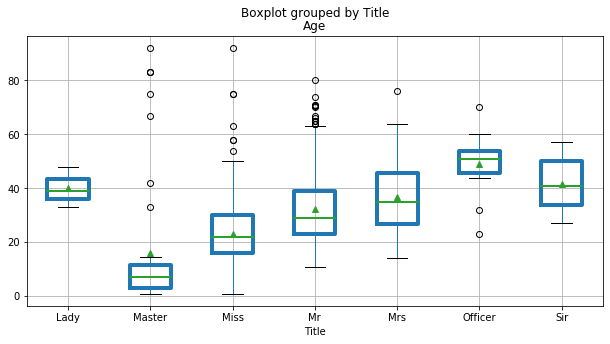

In [102]:
# Box plot of Age with title
boxprops = dict(linestyle='-', linewidth=4, color='k')
medianprops = dict(linestyle='-', linewidth=2)
df[df.Age.notnull()].boxplot('Age','Title',showfliers=True, showmeans=True,
                boxprops=boxprops,
                medianprops=medianprops);

In [103]:
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
902,NaN,NaN,S,7.8958,"Ilieff, Mr. Ylio",0,3,male,0,-888,349220,Mr
914,NaN,NaN,S,31.6833,"Flegenheim, Mrs. Alfred (Antoinette)",0,1,female,0,-888,PC 17598,Mrs
921,NaN,NaN,C,21.6792,"Samaan, Mr. Elias",0,3,male,2,-888,2662,Mr
925,NaN,NaN,S,23.4500,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",2,3,female,1,-888,W./C. 6607,Mrs
928,NaN,NaN,S,8.0500,"Roth, Miss. Sarah A",0,3,female,0,-888,342712,Miss
931,NaN,NaN,S,56.4958,"Hee, Mr. Ling",0,3,male,0,-888,1601,Mr
933,NaN,D34,S,26.5500,"Franklin, Mr. Thomas Parham",0,1,male,0,-888,113778,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
847,NaN,NaN,S,69.5500,"Sage, Mr. Douglas Bullen",2,3,male,8,0,CA. 2343,Mr


In [107]:
# replace missing values
title_age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median , inplace=True)

In [108]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


In [110]:
df[df.Age<1 | df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,


# Outliers Detection

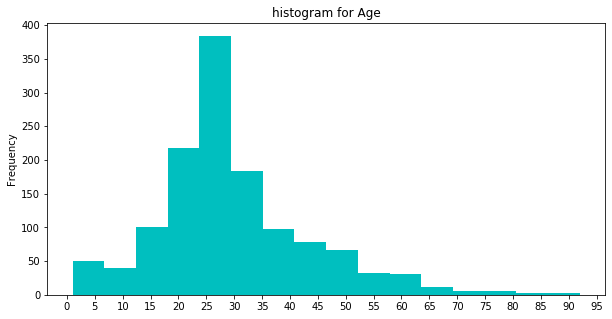

In [117]:
df.Age.plot(kind='hist', title='histogram for Age', color='c',xticks=range(0,100,5), bins=16);

In [120]:
df.loc[df.Age>70,]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-888,19877,Mrs
1142,92.0,NaN,S,27.7500,"West, Miss. Barbara J",2,2,female,1,-888,C.A. 34651,Miss
1173,75.0,NaN,S,13.7750,"Peacock, Master. Alfred Edward",1,3,male,1,-888,SOTON/O.Q. 3101315,Master
1199,83.0,NaN,S,9.3500,"Aks, Master. Philip Frank",1,3,male,0,-888,392091,Master
79,83.0,NaN,S,29.0000,"Caldwell, Master. Alden Gates",2,2,male,0,1,248738,Master
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,Mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,Mr
306,92.0,C22 C26,S,151.5500,"Allison, Master. Hudson Trevor",2,1,male,1,1,113781,Master
470,75.0,NaN,C,19.2583,"Baclini, Miss. Helene Barbara",1,3,female,2,1,2666,Miss


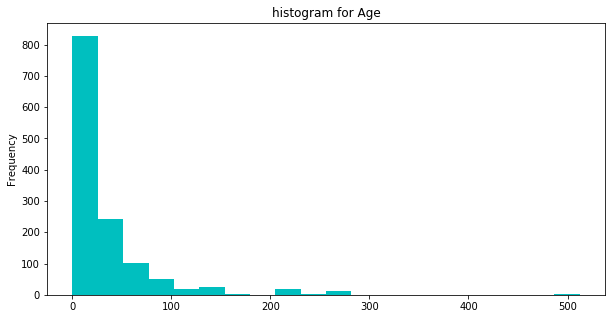

In [121]:
df.Fare.plot(kind='hist', title='histogram for fare', color='c', bins=20);

In [164]:
import math
df["AgeCategory"]= df[df.Age.notnull()].Age.map(lambda x : math.ceil(x/5)*5)


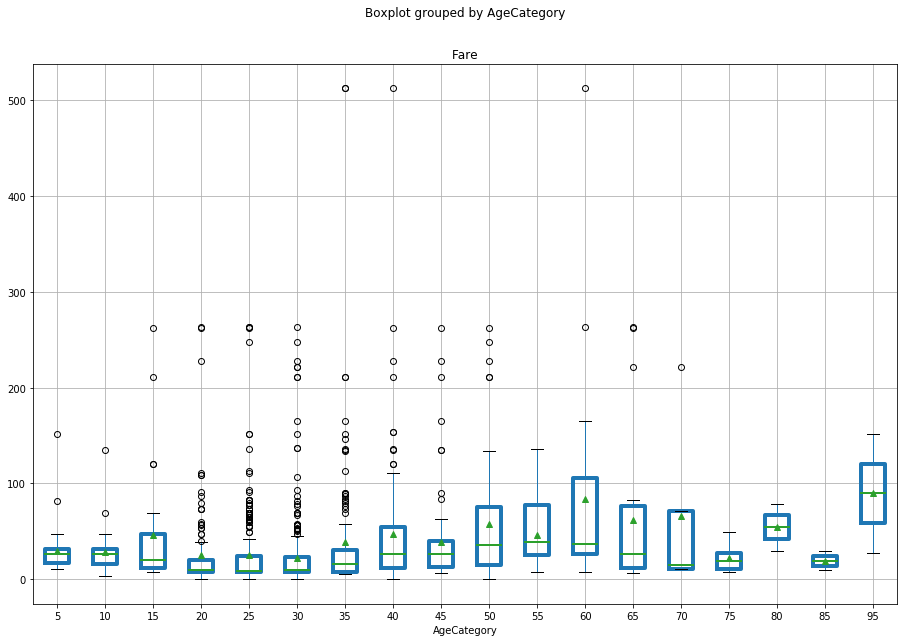

In [158]:
# Box plot of Age with title
plt.rcParams['figure.figsize'] = [15,10 ]
boxprops = dict(linestyle='-', linewidth=4, color='k')
medianprops = dict(linestyle='-', linewidth=2)
df.boxplot('Fare',"AgeCategory",showfliers=True, showmeans=True,
                boxprops=boxprops,
                medianprops=medianprops);
plt.rcParams['figure.figsize'] = [10,5 ]

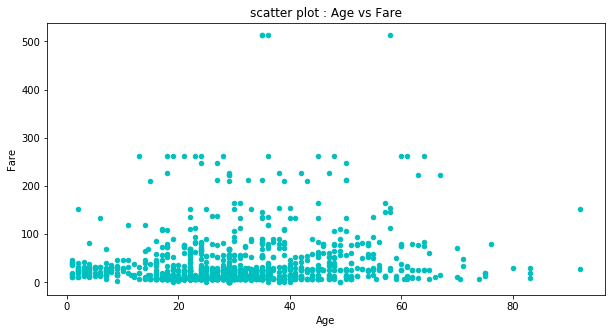

In [159]:
df.plot.scatter(x='Age', y='Fare', color='c', title='scatter plot : Age vs Fare');

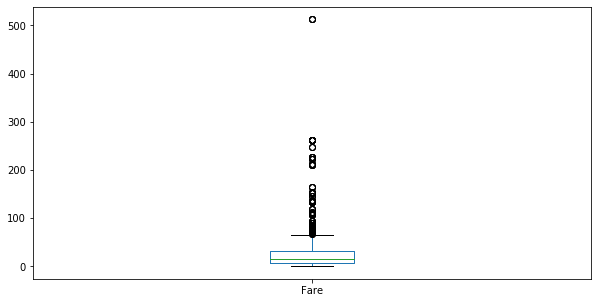

In [160]:
df.Fare.plot(kind='box')

In [166]:
df.loc[df.Fare==df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,AgeRange,AgeCategory
PassengerId,,,,,,,,,,,,,,
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,Mrs,"(55, 60]",60
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss,"(30, 35]",35
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr,"(35, 40]",40
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr,"(30, 35]",35


In [167]:
# Try some transformations to reduce the skewness
LogFare = np.log(df.Fare + 1.0) # Adding 1 to accomodate zero fares : log(0) is not defined

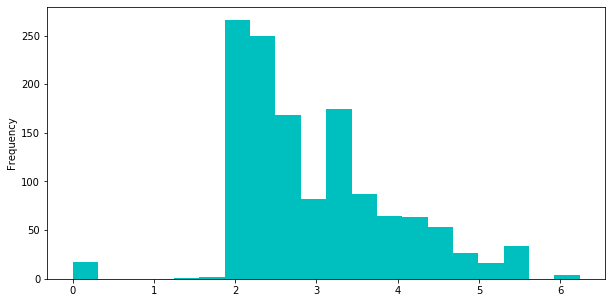

In [171]:
# Histogram of LogFare
LogFare.plot(kind='hist', color='c', bins=20);


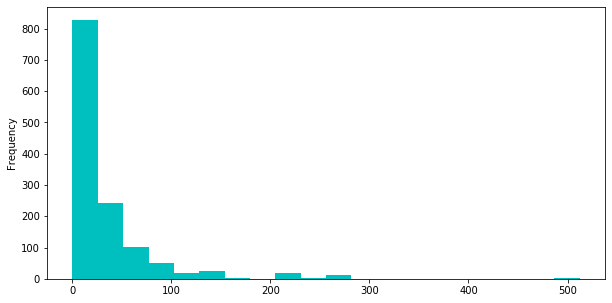

In [172]:
df.Fare.plot(kind='hist', color='c', bins=20);

In [178]:
# binning
pd.qcut(df.Fare, 4)

PassengerId
892     (-0.001, 7.896]
893     (-0.001, 7.896]
894     (7.896, 14.454]
895     (7.896, 14.454]
896     (7.896, 14.454]
897     (7.896, 14.454]
898     (-0.001, 7.896]
             ...       
885     (-0.001, 7.896]
886    (14.454, 31.275]
887     (7.896, 14.454]
888    (14.454, 31.275]
889    (14.454, 31.275]
890    (14.454, 31.275]
891     (-0.001, 7.896]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [179]:
pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high']) # discretization

PassengerId
892    very_low
893    very_low
894         low
895         low
896         low
897         low
898    very_low
         ...   
885    very_low
886        high
887         low
888        high
889        high
890        high
891    very_low
Name: Fare, Length: 1309, dtype: category
Categories (4, object): [very_low < low < high < very_high]

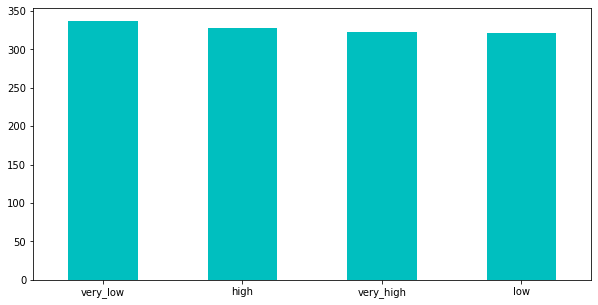

In [180]:
pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar', color='c', rot=0);

In [213]:
df.Age.max()
step=10
category_labels = range(0,int(df.Age.max()) + step,step)

        
df['Age_Category']=pd.qcut(df['Age'],6,labels=['0-19','19-24','24-29','29-32','32-42','42-92'])

df.Age_Category.unique()

[32-42, 42-92, 24-29, 19-24, 0-19, 29-32]
Categories (6, object): [0-19 < 19-24 < 24-29 < 29-32 < 32-42 < 42-92]

In [214]:
df['Fare_Category']=pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high'])

## Feature Engineering

### Feature : Age State ( Adult or Child )

In [215]:
# AgeState based on Age
df['AgeState'] = np.where(df['Age'] >= 18, 'Adult','Child')

In [216]:
# AgeState Counts
df['AgeState'].value_counts()

Adult    1158
Child     151
Name: AgeState, dtype: int64

In [217]:
# crosstab
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,286,56


In [218]:
# crosstab
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeCategory)

AgeCategory,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,95
Survived,,,,,,,,,,,,,,,,,,
0,13,15,8,63,94,171,50,39,30,23,15,11,10,3,4,0,0,0
1,24,9,11,33,64,56,55,28,18,16,10,7,4,1,2,1,2,1


### Feature : FamilySize

In [221]:
# Family : Adding Parents with Siblings
df['FamilySize'] = df.Parch + df.SibSp + 1 # 1 for self

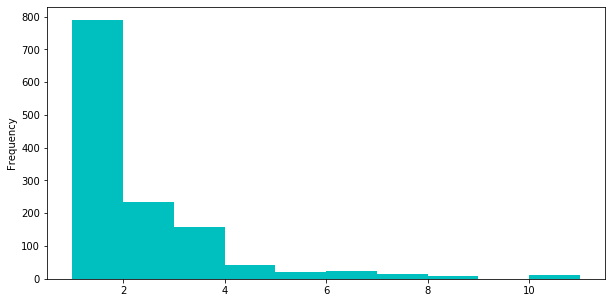

In [220]:
# explore the family feature
df['FamilySize'].plot(kind='hist', color='c');

In [222]:
# further explore this family with max family members
df.loc[df.FamilySize == df.FamilySize.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,AgeRange,AgeCategory,Age_Category,Fare_Category,AgeState,FamilySize
PassengerId,,,,,,,,,,,,,,,,,,
1080,22.0,NaN,S,69.55,"Sage, Miss. Ada",2,3,female,8,-888,CA. 2343,Miss,"(20, 25]",25,19-24,very_high,Adult,11
1234,29.0,NaN,S,69.55,"Sage, Mr. John George",9,3,male,1,-888,CA. 2343,Mr,"(25, 30]",30,24-29,very_high,Adult,11
1252,14.5,NaN,S,69.55,"Sage, Master. William Henry",2,3,male,8,-888,CA. 2343,Master,"(10, 15]",15,0-19,very_high,Child,11
1257,35.0,NaN,S,69.55,"Sage, Mrs. John (Annie Bullen)",9,3,female,1,-888,CA. 2343,Mrs,"(30, 35]",35,32-42,very_high,Adult,11
160,7.0,NaN,S,69.55,"Sage, Master. Thomas Henry",2,3,male,8,0,CA. 2343,Master,"(5, 10]",10,0-19,very_high,Child,11
181,22.0,NaN,S,69.55,"Sage, Miss. Constance Gladys",2,3,female,8,0,CA. 2343,Miss,"(20, 25]",25,19-24,very_high,Adult,11
202,29.0,NaN,S,69.55,"Sage, Mr. Frederick",2,3,male,8,0,CA. 2343,Mr,"(25, 30]",30,24-29,very_high,Adult,11
325,29.0,NaN,S,69.55,"Sage, Mr. George John Jr",2,3,male,8,0,CA. 2343,Mr,"(25, 30]",30,24-29,very_high,Adult,11
793,22.0,NaN,S,69.55,"Sage, Miss. Stella Anna",2,3,female,8,0,CA. 2343,Miss,"(20, 25]",25,19-24,very_high,Adult,11


In [223]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


### Feature : IsMother

In [224]:
# a lady aged more thana 18 who has Parch >0 and is married (not Miss)
df['IsMother'] = np.where(((df.Sex == 'female') & (df.Parch > 0) & (df.Age > 18) & (df.Title != 'Miss')), 1, 0)

In [225]:
# Crosstab with IsMother
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


### Deck

In [226]:
# explore Cabin values
#NaN people not assign to a particular cabin
df.Cabin

PassengerId
892     NaN
893     NaN
894     NaN
895     NaN
896     NaN
897     NaN
898     NaN
       ... 
885     NaN
886     NaN
887     NaN
888     B42
889     NaN
890    C148
891     NaN
Name: Cabin, Length: 1309, dtype: object

In [227]:
# use unique to get unique values for Cabin feature
df.Cabin.unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105', 'C123', 'C103', 'D56', 'A6', 'D33', 'B30',
       'C52', 'B28', 'C83', 'F G73', 'A5', 'D26', 'C110', 'E101', 'F E69',
       'D47', 'B86', 'C2', 'E33', 'B19', 'A7', 'C49', 'A32', 'B4', 'B80',
       'A31', 'D36', 'C93', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125',
       'C99', 'C118', 'D7', 'A19', 'B49', 'C65', 'E36', 'B18', 'C124

In [228]:
# look at the Cabin = T
df.loc[df.Cabin == 'T']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,AgeRange,AgeCategory,Age_Category,Fare_Category,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0,113784,Mr,"(40, 45]",45,42-92,very_high,Adult,1,0


In [229]:
# set the value to NaN
df.loc[df.Cabin == 'T', 'Cabin'] = np.NaN

In [230]:
# look at the unique values of Cabin again
df.Cabin.unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105', 'C123', 'C103', 'D56', 'A6', 'D33', 'B30',
       'C52', 'B28', 'C83', 'F G73', 'A5', 'D26', 'C110', 'E101', 'F E69',
       'D47', 'B86', 'C2', 'E33', 'B19', 'A7', 'C49', 'A32', 'B4', 'B80',
       'A31', 'D36', 'C93', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125',
       'C99', 'C118', 'D7', 'A19', 'B49', 'C65', 'E36', 'B18', 'C124

In [231]:
# extract first character of Cabin string to the deck
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')
df['Deck'] = df['Cabin'].map(lambda x : get_deck(x))

In [232]:
# check counts
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [233]:
# use crosstab to look into survived feature cabin wise
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 20 columns):
Age              1309 non-null float64
Cabin            294 non-null object
Embarked         1309 non-null object
Fare             1309 non-null float64
Name             1309 non-null object
Parch            1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
SibSp            1309 non-null int64
Survived         1309 non-null int64
Ticket           1309 non-null object
Title            1309 non-null object
AgeRange         1309 non-null category
AgeCategory      1309 non-null int64
Age_Category     1309 non-null category
Fare_Category    1309 non-null category
AgeState         1309 non-null object
FamilySize       1309 non-null int64
IsMother         1309 non-null int64
Deck             1309 non-null object
dtypes: category(3), float64(2), int64(7), object(8)
memory usage: 228.6+ KB


### Categorical Feature Encoding

In [235]:
# sex
df['IsMale'] = np.where(df.Sex == 'male', 1, 0)

In [238]:
# columns Deck, Pclass, Title, AgeState
df=pd.get_dummies(df,columns=['Deck', 'Pclass','Title', 'Fare_Category', 'Embarked','AgeState'])

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 42 columns):
Age                        1309 non-null float64
Cabin                      294 non-null object
Fare                       1309 non-null float64
Name                       1309 non-null object
Parch                      1309 non-null int64
Sex                        1309 non-null object
SibSp                      1309 non-null int64
Survived                   1309 non-null int64
Ticket                     1309 non-null object
AgeRange                   1309 non-null category
AgeCategory                1309 non-null int64
Age_Category               1309 non-null category
FamilySize                 1309 non-null int64
IsMother                   1309 non-null int64
IsMale                     1309 non-null int64
Deck_A                     1309 non-null uint8
Deck_B                     1309 non-null uint8
Deck_C                     1309 non-null uint8
Deck_D                     1309 n

### Drop and Reorder Columns


In [242]:
# drop columns
df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis=1, inplace=True)

In [243]:
# reorder columns
columns = [column for column in df.columns if column != 'Survived']
columns = ['Survived'] + columns
df = df[columns]

In [244]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 36 columns):
Survived                   1309 non-null int64
Age                        1309 non-null float64
Fare                       1309 non-null float64
AgeRange                   1309 non-null category
AgeCategory                1309 non-null int64
Age_Category               1309 non-null category
FamilySize                 1309 non-null int64
IsMother                   1309 non-null int64
IsMale                     1309 non-null int64
Deck_A                     1309 non-null uint8
Deck_B                     1309 non-null uint8
Deck_C                     1309 non-null uint8
Deck_D                     1309 non-null uint8
Deck_E                     1309 non-null uint8
Deck_F                     1309 non-null uint8
Deck_G                     1309 non-null uint8
Deck_Z                     1309 non-null uint8
Pclass_1                   1309 non-null uint8
Pclass_2                   1309 non-

# Save to a file

In [246]:
processed_data_path = os.path.join(os.path.pardir,'data','processed')
write_train_path = os.path.join(processed_data_path, 'train_process.csv')
write_test_path = os.path.join(processed_data_path, 'test_process.csv')

In [247]:
# train data
df.loc[df.Survived != -888].to_csv(write_train_path) 
# test data
columns = [column for column in df.columns if column != 'Survived']
df.loc[df.Survived == -888, columns].to_csv(write_test_path) 

### Building the data processing script

In [248]:
get_processed_data_script_file = os.path.join(os.path.pardir,'src','data','get_processed_data.py')

In [252]:
%%writefile $get_processed_data_script_file
import numpy as np
import pandas as pd
import os

def read_data():
    # set the path of the raw data
    raw_data_path = os.path.join(os.path.pardir,'data','raw')
    train_file_path = os.path.join(raw_data_path, 'train.csv')
    test_file_path = os.path.join(raw_data_path, 'test.csv')
    # read the data with all default parameters
    train_df = pd.read_csv(train_file_path, index_col='PassengerId')
    test_df = pd.read_csv(test_file_path, index_col='PassengerId')
    test_df['Survived'] = -888
    df = pd.concat((train_df, test_df), axis=0, sort=True)
    return df



def process_data(df):
    # using the method chaining concept
    return (df
         # create title attribute - then add this 
         .assign(Title = lambda x: x.Name.map(get_title))
         # working missing values - start with this
         .pipe(fill_missing_values)
         # create fare bin feature
         .assign(Fare_Bin = lambda x: pd.qcut(x.Fare, 4, labels=['very_low','low','high','very_high']))
         # create age state
         .assign(AgeState = lambda x : np.where(x.Age >= 18, 'Adult','Child'))
         .assign(FamilySize = lambda x : x.Parch + x.SibSp + 1)
         .assign(IsMother = lambda x : np.where(((x.Sex == 'female') & (x.Parch > 0) & (x.Age > 18) & (x.Title != 'Miss')), 1, 0))
          # create deck feature
         .assign(Cabin = lambda x: np.where(x.Cabin == 'T', np.nan, x.Cabin)) 
         .assign(Deck = lambda x : x.Cabin.map(get_deck))
         # feature encoding 
         .assign(IsMale = lambda x : np.where(x.Sex == 'male', 1,0))
         .pipe(pd.get_dummies, columns=['Deck', 'Pclass','Title', 'Fare_Bin', 'Embarked','AgeState'])
         # add code to drop unnecessary columns
         .drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis=1)
         # reorder columns
         .pipe(reorder_columns)
         )

def get_title(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')

def fill_missing_values(df):
    # embarked
    df.Embarked.fillna('C', inplace=True)
    # fare
    median_fare = df[(df.Pclass == 3) & (df.Embarked == 'S')]['Fare'].median()
    df.Fare.fillna(median_fare, inplace=True)
    # age
    title_age_median = df.groupby('Title').Age.transform('median')
    df.Age.fillna(title_age_median , inplace=True)
    return df

def reorder_columns(df):
    columns = [column for column in df.columns if column != 'Survived']
    columns = ['Survived'] + columns
    df = df[columns]
    return df 

    
def write_data(df):
    processed_data_path = os.path.join(os.path.pardir,'data','processed')
    write_train_path = os.path.join(processed_data_path, 'train.csv')
    write_test_path = os.path.join(processed_data_path, 'test.csv')
    # train data
    df[df.Survived != -888].to_csv(write_train_path) 
    # test data
    columns = [column for column in df.columns if column != 'Survived']
    df[df.Survived == -888][columns].to_csv(write_test_path) 

if __name__ == '__main__':
    df = read_data()
    df = process_data(df)
    write_data(df)

Overwriting ../src/data/get_processed_data.py


In [253]:
!python $get_processed_data_script_file

In [254]:
train_df = pd.read_csv(write_train_path)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 37 columns):
PassengerId                891 non-null int64
Survived                   891 non-null int64
Age                        891 non-null float64
Fare                       891 non-null float64
AgeRange                   891 non-null object
AgeCategory                891 non-null int64
Age_Category               891 non-null object
FamilySize                 891 non-null int64
IsMother                   891 non-null int64
IsMale                     891 non-null int64
Deck_A                     891 non-null int64
Deck_B                     891 non-null int64
Deck_C                     891 non-null int64
Deck_D                     891 non-null int64
Deck_E                     891 non-null int64
Deck_F                     891 non-null int64
Deck_G                     891 non-null int64
Deck_Z                     891 non-null int64
Pclass_1                   891 non-null int64
Pclass_2       

### Advanced visualization using MatPlotlib


In [255]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 82., 140., 361., 435., 134.,  90.,  45.,  11.,   6.,   5.]),
 array([ 1. , 10.1, 19.2, 28.3, 37.4, 46.5, 55.6, 64.7, 73.8, 82.9, 92. ]),
 <a list of 10 Patch objects>)

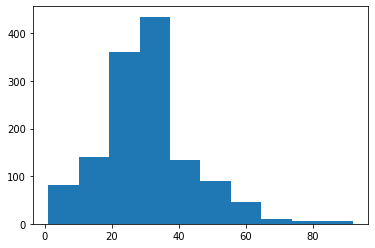

In [256]:
plt.hist(df.Age)

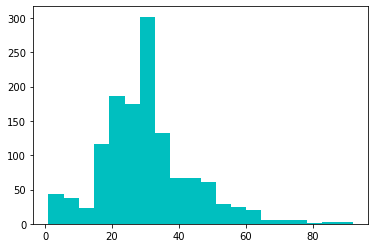

In [257]:
plt.hist(df.Age, bins=20, color='c')
plt.show()

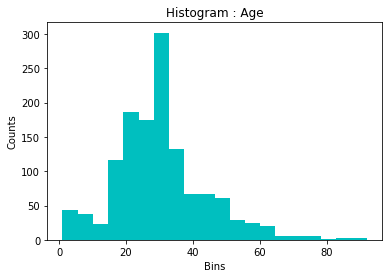

In [258]:
plt.hist(df.Age, bins=20, color='c')
plt.title('Histogram : Age')
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.show()

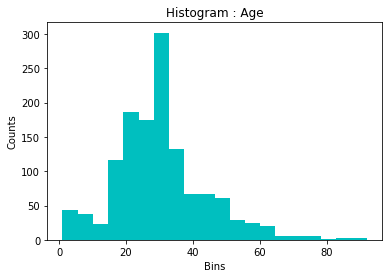

In [259]:
f , ax = plt.subplots()
ax.hist(df.Age, bins=20, color='c')
ax.set_title('Histogram : Age')
ax.set_xlabel('Bins')
ax.set_ylabel('Counts')
plt.show()

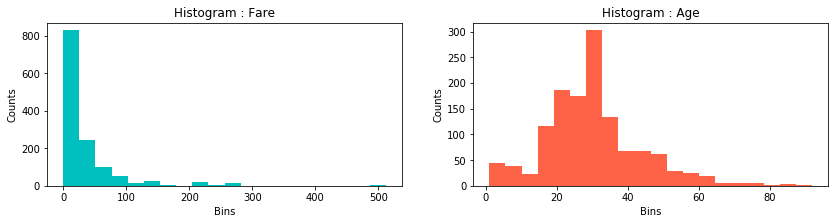

In [260]:
# Add subplots
f , (ax1, ax2) = plt.subplots(1, 2 , figsize=(14,3))

ax1.hist(df.Fare, bins=20, color='c')
ax1.set_title('Histogram : Fare')
ax1.set_xlabel('Bins')
ax1.set_ylabel('Counts')

ax2.hist(df.Age, bins=20, color='tomato')
ax2.set_title('Histogram : Age')
ax2.set_xlabel('Bins')
ax2.set_ylabel('Counts')

plt.show()

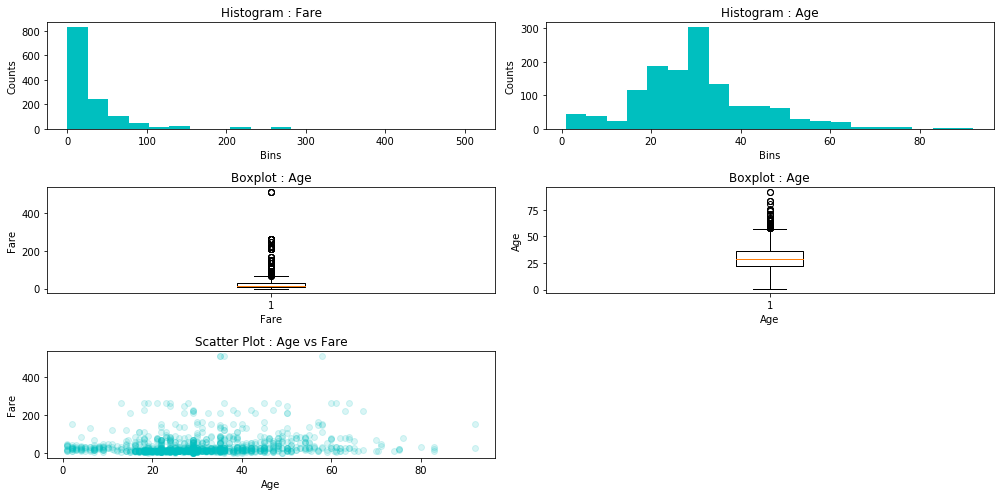

In [261]:
# Adding subplots
f , ax_arr = plt.subplots(3 , 2 , figsize=(14,7))

# Plot 1
ax_arr[0,0].hist(df.Fare, bins=20, color='c')
ax_arr[0,0].set_title('Histogram : Fare')
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Counts')

# Plot 2
ax_arr[0,1].hist(df.Age, bins=20, color='c')
ax_arr[0,1].set_title('Histogram : Age')
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Counts')

# Plot 3
ax_arr[1,0].boxplot(df.Fare.values)
ax_arr[1,0].set_title('Boxplot : Age')
ax_arr[1,0].set_xlabel('Fare')
ax_arr[1,0].set_ylabel('Fare')

# Plot 4
ax_arr[1,1].boxplot(df.Age.values)
ax_arr[1,1].set_title('Boxplot : Age')
ax_arr[1,1].set_xlabel('Age')
ax_arr[1,1].set_ylabel('Age')

# Plot 5
ax_arr[2,0].scatter(df.Age, df.Fare, color='c', alpha=0.15)
ax_arr[2,0].set_title('Scatter Plot : Age vs Fare')
ax_arr[2,0].set_xlabel('Age')
ax_arr[2,0].set_ylabel('Fare')

ax_arr[2, 1].axis('off') # add it later - 2
plt.tight_layout() # add it later - 1

plt.show()

In [277]:
# family size 
family_survived = pd.crosstab(df[df.Survived != -888].FamilySize, df[df.Survived != -888].Survived)
family_survived.columns = ['Not Survived', 'Survived']
print (family_survived)

            Not Survived  Survived
FamilySize                        
1                    374       163
2                     72        89
3                     43        59
4                      8        21
5                     12         3
6                     19         3
7                      8         4
8                      6         0
11                     7         0


In [278]:
# impact of family size on survival rate
family_survived =  df[df.Survived != -888].groupby(['FamilySize','Survived']).size().unstack()
family_survived.columns = ['Not Survived', 'Survived']
print (family_survived)

            Not Survived  Survived
FamilySize                        
1                  374.0     163.0
2                   72.0      89.0
3                   43.0      59.0
4                    8.0      21.0
5                   12.0       3.0
6                   19.0       3.0
7                    8.0       4.0
8                    6.0       NaN
11                   7.0       NaN


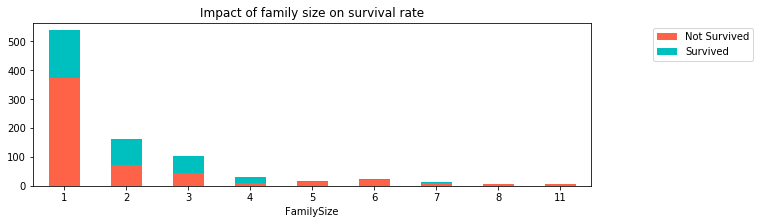

In [285]:
# Mix and Match
f, ax = plt.subplots(figsize=(10,3))
ax.set_title('Impact of family size on survival rate')
family_survived.plot(kind='bar', stacked=True, color=['tomato','c'], ax=ax, rot=0)
plt.legend(bbox_to_anchor=(1.3,1.0))
plt.show()
#Este grafico muestra los valores totales pero dado la diferencia de escalas no se puede 
#apreciar el verdadero impacto del FamilySize con respecto a la supervivencia

In [288]:
family_survived.sum(axis = 1)
#En la matriz de family_survived sumo todos los casos por tamaño de familia

FamilySize
1     537.0
2     161.0
3     102.0
4      29.0
5      15.0
6      22.0
7      12.0
8       6.0
11      7.0
dtype: float64

In [283]:
#Calculo la proporcion de supervivencia de cada familySize
#de esta forma llevo todas las categorias a la misma escala!!! MUY IMPORTANTE!!!
scaled_family_survived = family_survived.div(family_survived.sum(axis=1), axis=0)
print (scaled_family_survived)

            Not Survived  Survived
FamilySize                        
1               0.696462  0.303538
2               0.447205  0.552795
3               0.421569  0.578431
4               0.275862  0.724138
5               0.800000  0.200000
6               0.863636  0.136364
7               0.666667  0.333333
8               1.000000       NaN
11              1.000000       NaN


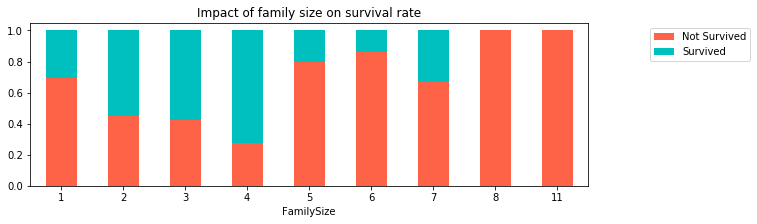

In [289]:
# Mix and Match
f, ax = plt.subplots(figsize=(10,3))
ax.set_title('Impact of family size on survival rate')
scaled_family_survived.plot(kind='bar', stacked=True, color=['tomato','c'], ax=ax, rot=0)
plt.legend(bbox_to_anchor=(1.3,1.0))
plt.show()

In [293]:
#!pip install version_information
%load_ext version_information

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


In [295]:
%version_information pandas, numpy, matplotlib, seaborn

Software versions
Python 3.7.3 64bit [Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 7.6.1
OS Darwin 18.6.0 x86_64 i386 64bit
pandas 0.24.2
numpy 1.16.4
matplotlib 3.1.0
seaborn 0.9.0
Sun Sep 08 20:05:24 2019 -03